In [26]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np
import random
import time

In [27]:
def make_graph_nx(node_list, target_nodes, edge_list):
    G = nx.Graph()
    labels = {}
    for node in node_list:
        labels[node] = node
        G.add_node(node)

    G.add_node(target_nodes[0])
    labels[target_nodes[0]] = target_nodes[0]
    G.add_node(target_nodes[1])
    labels[target_nodes[1]] = target_nodes[1]

    for edge in edge_list:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.kamada_kawai_layout(G)

    return G, pos, labels


def draw_graph(graph, pos, nodes, targets, labels):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


def draw_shortest_path_graph(graph, pos, nodes, targets, labels, path_nodes):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='y', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


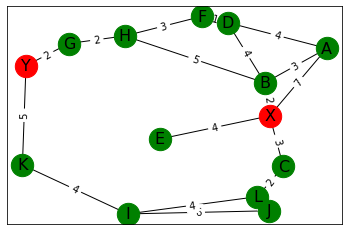

In [28]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
targets = ['X', 'Y']
edges = [
    ('X', 'A', 7),
    ('X', 'B', 2),
    ('X', 'C', 3),
    ('X', 'E', 4),
    ('A', 'B', 3),
    ('A', 'D', 4),
    ('B', 'D', 4),
    ('B', 'H', 5),
    ('C', 'L', 2),
    ('D', 'F', 1),
    ('F', 'H', 3),
    ('G', 'H', 2),
    ('G', 'Y', 2),
    ('I', 'J', 6),
    ('I', 'K', 4),
    ('I', 'L', 4),
    ('J', 'L', 1),
    ('K', 'Y', 5),
]

G, pos, labels = make_graph_nx(nodes, targets, edges)
draw_graph(G, pos, nodes, targets, labels)

In [29]:
pred_dijkstra, dist_dijkstra = nx.dijkstra_predecessor_and_distance(G, 'X')

data_dijkstra = []
for key, val in sorted(dist_dijkstra.items()):
    data_dijkstra.append(['X', key, val, pred_dijkstra[key]])

df_dijkstra = pd.DataFrame(data_dijkstra, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_dijkstra

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [30]:
shortest_path_dijkstra = nx.dijkstra_path(G, 'X', 'Y', weight='weight')
path_nodes_dijkstra = shortest_path_dijkstra[1:len(shortest_path_dijkstra)-1]
print(shortest_path_dijkstra)

['X', 'B', 'H', 'G', 'Y']


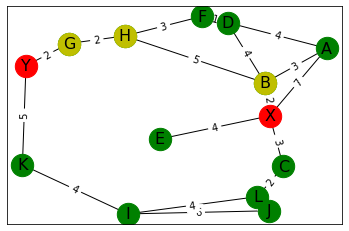

In [31]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_dijkstra)

In [32]:
pred_bf, dist_bf = nx.bellman_ford_predecessor_and_distance(G, 'X')

data_bf = []
for key, val in sorted(dist_bf.items()):
    data_bf.append(['X', key, val, pred_bf[key]])

df_bf = pd.DataFrame(data_bf, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_bf

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [33]:
shortest_path_bf = nx.bellman_ford_path(G, 'X', 'Y', weight='weight')
path_nodes_bf = shortest_path_bf[1:len(shortest_path_bf)-1]
print(shortest_path_bf)
print(path_nodes_bf)

['X', 'B', 'H', 'G', 'Y']
['B', 'H', 'G']


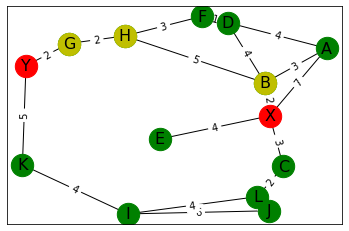

In [34]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_bf)

In [35]:
small_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    small_graphs.append(g)

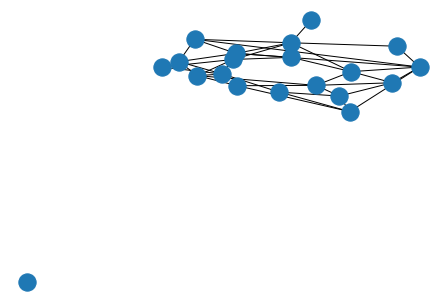

In [36]:
nx.draw(small_graphs[0])

In [37]:
def calc_dijkstra(g):
    start = time.time()
    pred, dist = nx.dijkstra_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_bellman_ford(g):
    start = time.time()
    pred, dist = nx.bellman_ford_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_floyd_warshall(g):
    start = time.time()
    pred, dist = nx.floyd_warshall_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

small_data = []
for graph in small_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    small_data.append([time_d, time_bf, time_fw])
    
small_time_df = pd.DataFrame(small_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])

In [38]:
neg_weights_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(-10,10)
    neg_weights_graphs.append(g)

neg_weights_data = []
for graph in neg_weights_graphs:
    time_fw = calc_floyd_warshall(graph)
    neg_weights_data.append(time_fw)

small_time_df['Floyd-Warshall (Negative)'] = neg_weights_data
small_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall,Floyd-Warshall (Negative)
0,0.000104,0.000427,0.002481,0.001112
1,0.000183,0.000522,0.004043,0.001456
2,0.000109,0.000230,0.002634,0.001114
3,0.000199,0.000409,0.003988,0.001078
4,0.000154,0.000473,0.002156,0.001128
...,...,...,...,...
995,0.000148,0.000241,0.001743,0.001106
996,0.000089,0.000215,0.001508,0.001222
997,0.000093,0.000225,0.001508,0.001125
998,0.000091,0.000243,0.001745,0.001073


In [39]:
large_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(100,200)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    large_graphs.append(g)

large_data = []
for graph in large_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    large_data.append([time_d, time_bf, time_fw])

large_time_df = pd.DataFrame(large_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])
large_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall
0,0.000446,0.002616,0.189569
1,0.000431,0.002055,0.184923
2,0.000442,0.001259,0.199175
3,0.000417,0.001803,0.138196
4,0.000310,0.000984,0.125026
...,...,...,...
995,0.000317,0.000948,0.125762
996,0.000387,0.000865,0.126939
997,0.000319,0.000853,0.149465
998,0.000398,0.001331,0.134147


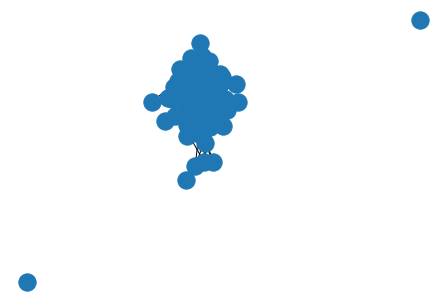

In [40]:
nx.draw(large_graphs[0])

In [41]:
small_graphs_avg_time = [
    small_time_df['Dijkstra'].sum()/len(small_time_df['Dijkstra']),
    small_time_df['Bellman-Ford'].sum()/len(small_time_df['Bellman-Ford']),
    small_time_df['Floyd-Warshall'].sum()/len(small_time_df['Floyd-Warshall']),
    small_time_df['Floyd-Warshall (Negative)'].sum()/len(small_time_df['Floyd-Warshall (Negative)'])
]

large_graphs_avg_time = [
    large_time_df['Dijkstra'].sum()/len(large_time_df['Dijkstra']),
    large_time_df['Bellman-Ford'].sum()/len(large_time_df['Bellman-Ford']),
    large_time_df['Floyd-Warshall'].sum()/len(large_time_df['Floyd-Warshall'])
]

print(small_graphs_avg_time)
print(large_graphs_avg_time)

[0.00011485147476196289, 0.00034121465682983396, 0.0019046409130096436, 0.00185054612159729]
[0.00037028861045837404, 0.0009911851882934571, 0.13318682527542114]


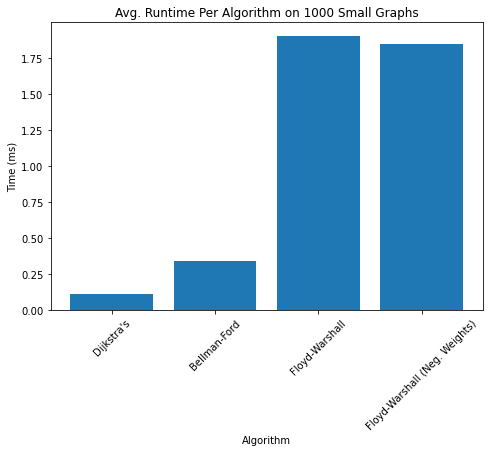

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithm = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall', 'Floyd-Warshall (Neg. Weights)']
time = np.asarray(small_graphs_avg_time) * 1000
ax.bar(algorithm, time)
plt.title('Avg. Runtime Per Algorithm on 1000 Small Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

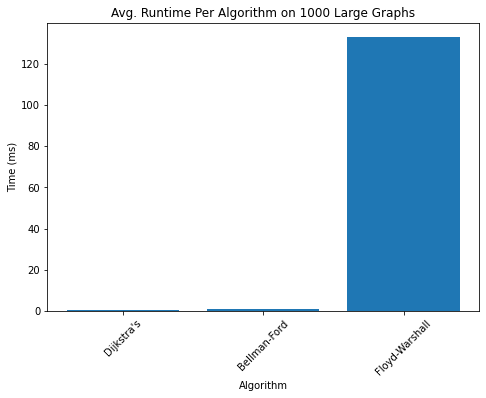

In [43]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
algorithm2 = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall']
time2 = np.asarray(large_graphs_avg_time) * 1000
ax2.bar(algorithm2, time2)
plt.title('Avg. Runtime Per Algorithm on 1000 Large Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

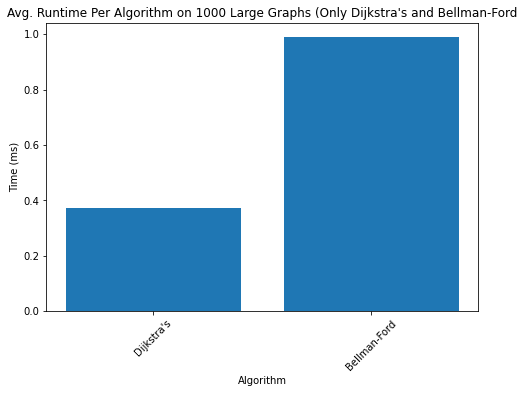

In [44]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
algorithm3 = ['Dijkstra\'s', 'Bellman-Ford']
time3 = np.asarray(large_graphs_avg_time[:len(large_graphs_avg_time)-1]) * 1000
ax3.bar(algorithm3, time3)
plt.title('Avg. Runtime Per Algorithm on 1000 Large Graphs (Only Dijkstra\'s and Bellman-Ford')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

In [47]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

data = [
    go.Bar(x=algorithm3, y=np.asarray(large_graphs_avg_time[:len(large_graphs_avg_time)-1]) * 1000, name='Runtime Large Graphs',  
            #base=0
           ),
    go.Bar(x=algorithm3, y=np.asarray(small_graphs_avg_time[:len(small_graphs_avg_time)-1]) * 1000, name='Runtime Small Graphs', 
           #base=0,
           #width=0.5
          )]

layout = go.Layout(
    barmode='overlay',
)

fig = dict(data = data, layout = layout)
iplot(fig, show_link=False)

In [51]:
print(small_graphs_avg_time[0]/small_graphs_avg_time[1])
print(large_graphs_avg_time[0]/large_graphs_avg_time[1])

0.33659595935599007
0.3735816624700649
